# Checkpoint 2
## Alunos: Gabriel Gomes e Wandra Martins
## Setor escolhido: Saúde (Dados do SISAGUA)
### Bases escolhidas:
- **municipios_mg.csv** (Base de dados dos municípios no estado de Minas Gerais, mantido por um usuário do GitHub)
- **trat_mg.csv** (Dados sobre o tratamento de água empregado nos sistemas e soluções alternativas de abastecimento de água para consumo humano, informados pelo prestador de serviço em frequência anual no estado de Minas Gerais)

### Importação de bibliotecas e mudanças nas configurações

In [84]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

### Carregamento das bases de dados

In [85]:
# Municípios de Minas Gerais
municipios = pd.read_csv('municipios_mg.csv', encoding='utf-8', dtype={'COD_IBGE': str})
municipios.head()

,COD_IBGE,NOME,LATITUDE,LONGITUDE
0,3100104,Abadia dos Dourados,-18.4831,-47.3916
1,3100203,Abaeté,-19.1551,-45.4444
2,3100302,Abre Campo,-20.2996,-42.4743
3,3100401,Acaiaca,-20.3590,-43.1439
4,3100500,Açucena,-19.0671,-42.5419


In [86]:
# Informações gerais
municipios.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COD_IBGE   853 non-null    object 
 1   NOME       853 non-null    object 
 2   LATITUDE   853 non-null    float64
 3   LONGITUDE  853 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.8+ KB


In [87]:
municipios.describe()

,LATITUDE,LONGITUDE
count,853.000000,853.000000
mean,-19.584236,-44.102022
std,1.924908,1.948347
min,-22.854000,-50.689400
25%,-21.093200,-45.459800
50%,-19.882600,-43.934300
75%,-18.483100,-42.616700
max,-14.266200,-39.939100


In [88]:
# Dados do tratamento de água de empresas mineiras
tratamento = pd.read_csv('trat_mg.csv', encoding='utf-8', dtype={'COD_IBGE': str, 'ANO': str, 'CARROPIPA': str, 'CHAFARIZ': str, 'FONTE': str, 'CISTERNA': str, 'CANALIZACAO': str})

# Removendo valores null/NaN restantes
tratamento['CANALIZACAO'] = tratamento.CANALIZACAO.fillna('N')
tratamento['CARROPIPA'] = tratamento.CARROPIPA.fillna('N')
tratamento['FONTE'] = tratamento.FONTE.fillna('N')
tratamento['CHAFARIZ'] = tratamento.CHAFARIZ.fillna('N')
tratamento['CISTERNA'] = tratamento.CISTERNA.fillna('N')
tratamento['VAZAO_AGUA'] = tratamento.VAZAO_AGUA.fillna(0.0)
tratamento['NUM_FILTROS'] = tratamento.NUM_FILTROS.fillna(0.0)
tratamento['OUTRA_ETP'] = tratamento.OUTRA_ETP.fillna('N')
tratamento['OUTRO_DESINF'] = tratamento.OUTRO_DESINF.fillna('N')
tratamento['OUTRO_SUPRIMENTO'] = tratamento.OUTRO_SUPRIMENTO.fillna('N')

tratamento.head()

,COD_IBGE,TIPO_INST,SIGLA_INST,NOME_INST,FORMA_ABASTEC,NOME_F_ABASTEC,NOME_ETA,ANO,CAPT_SUPERFICIAL,CAPT_SUBTERRANEA,CAPT_AGUA_CHUVA,TEMPO_MEDIO_FUNC,ETP_PRE_OXIDACAO,ETP_MIST_RAP_C0AG,ETP_FLOCULACAO,ETP_DECANTACAO,ETP_FLOTACAO,TIPO_FILTRACAO,NUM_FILTROS,IMP_MONIT,ETP_DESINFECCAO,DESINF_CLORO_GAS_HIPOC,DESINF_ISOCIANURATOS,DESINF_CLORAMINA,DESINF_DIOXIDO_CLORO,DESINF_OZONIO,DESINF_UV,OUTRO_DESINF,RAD_CLORO_RES_LIVRE,RAD_DIOX_CLORO,RAD_CLORO_RES_COMB,POLIM_COM_EPICOLIDRINA,POLIM_COM_ACRILAMIDA,ETP_FLUORETACAO,ETP_DESFLUORETACAO,OUTRA_ETP,VAZAO_AGUA,CARROPIPA,CHAFARIZ,FONTE,CISTERNA,CANALIZACAO,OUTRO_SUPRIMENTO
0,313005,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SAA ICARAI DE MINAS ...,ICARAI DE MINAS ...,2014,N,S,N,10:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,14.00,N,N,N,N,N,N
1,316460,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA SAO SEBASTIAO DO OESTE ...,ETA SAO SEBASTIÃO DO OESTE ...,2014,N,S,N,17:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,12.28,N,N,N,N,N,N
2,313830,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA LEANDRO FERREIRA ...,ETA LEANDRO FERREIRA ...,2014,N,S,N,11:00,N,N,N,N,N,SEM FILTRAÇÃO ...,0.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,11.50,N,N,N,N,N,N
3,314970,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA PERDIGAO ...,ETA PERDIGAO ...,2014,S,N,N,21:55,N,S,S,S,N,FILTRAÇÃO RÁPIDA ...,4.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,N,N,N,23.00,N,N,N,N,N,N
4,313290,Regional,COPASA,COMPANHIA DE SANEAMENTO DE MINAS GERAIS ...,SAA,SISTEMA DE ABASTECIMENTO DE AGUA DE ITAMOGI ...,COPASA MG ...,2014,S,N,N,16:08,N,S,S,S,N,FILTRAÇÃO LENTA ...,5.0,N,S,S,N,N,N,N,N,N,S,N,N,N,N,S,N,N,0.01,N,N,N,N,N,N


In [89]:
# Informações gerais
tratamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54039 entries, 0 to 54038
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COD_IBGE                54039 non-null  object 
 1   TIPO_INST               54039 non-null  object 
 2   SIGLA_INST              54039 non-null  object 
 3   NOME_INST               54039 non-null  object 
 4   FORMA_ABASTEC           54039 non-null  object 
 5   NOME_F_ABASTEC          54039 non-null  object 
 6   NOME_ETA                54039 non-null  object 
 7   ANO                     54039 non-null  object 
 8   CAPT_SUPERFICIAL        54039 non-null  object 
 9   CAPT_SUBTERRANEA        54039 non-null  object 
 10  CAPT_AGUA_CHUVA         54039 non-null  object 
 11  TEMPO_MEDIO_FUNC        54039 non-null  object 
 12  ETP_PRE_OXIDACAO        54039 non-null  object 
 13  ETP_MIST_RAP_C0AG       54039 non-null  object 
 14  ETP_FLOCULACAO          54039 non-null

In [90]:
tratamento.describe()

,NUM_FILTROS,VAZAO_AGUA
count,54039.000000,54039.000000
mean,0.971391,27.965571
std,2.209015,623.413527
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,5.010000
max,65.000000,40000.000000


In [91]:
municipios_num = municipios.copy()

# Definir colunas categóricas a serem transformadas
colunas_nao_numericas = ["COD_IBGE", "NOME"]

# Aplicar LabelEncoder para cada coluna categórica na cópia
le = LabelEncoder()

for coluna in colunas_nao_numericas:
    if coluna in municipios_num.columns:
        municipios_num[coluna] = le.fit_transform(municipios_num[coluna].astype(str))  # Convertendo para string antes de transformar

# Salvar o DataFrame transformado sem modificar o original
municipios_num.to_csv("municipios_mg_num.csv", index=False)


In [92]:
municipios_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COD_IBGE   853 non-null    int64  
 1   NOME       853 non-null    int64  
 2   LATITUDE   853 non-null    float64
 3   LONGITUDE  853 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 26.8 KB


In [93]:
tratamento_num = tratamento.copy()
# Transformando as colunas não numéricas em colunas numéricas
colunas_nao_numericas = [
    "TIPO_INST", "SIGLA_INST", "NOME_INST", "FORMA_ABASTEC", "NOME_F_ABASTEC", "NOME_ETA", "ANO", 
    "CAPT_SUPERFICIAL", "CAPT_SUBTERRANEA", "CAPT_AGUA_CHUVA", "TEMPO_MEDIO_FUNC", "ETP_PRE_OXIDACAO", "ETP_MIST_RAP_C0AG", 
    "ETP_FLOCULACAO", "ETP_DECANTACAO", "ETP_FLOTACAO", "TIPO_FILTRACAO", "IMP_MONIT", "ETP_DESINFECCAO", 
    "DESINF_CLORO_GAS_HIPOC", "DESINF_ISOCIANURATOS", "DESINF_CLORAMINA", "DESINF_DIOXIDO_CLORO", "DESINF_OZONIO", 
    "DESINF_UV", "OUTRO_DESINF", "RAD_CLORO_RES_LIVRE", "RAD_DIOX_CLORO", "RAD_CLORO_RES_COMB", "POLIM_COM_EPICOLIDRINA", 
    "POLIM_COM_ACRILAMIDA", "ETP_FLUORETACAO", "ETP_DESFLUORETACAO", "OUTRA_ETP", "CARROPIPA", "CHAFARIZ", "FONTE", 
    "CISTERNA", "CANALIZACAO", "OUTRO_SUPRIMENTO"
]

# Aplicando LabelEncoder para cada coluna categórica
le = LabelEncoder()

for coluna in colunas_nao_numericas:
    if coluna in tratamento_num.columns:
        tratamento_num[coluna] = le.fit_transform(tratamento_num[coluna].astype(str))  # Convertendo para string antes de transformar

# Salvando o DataFrame transformado
tratamento_num.to_csv("trat_num.csv", index=False)

In [94]:
tratamento_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54039 entries, 0 to 54038
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   COD_IBGE                54039 non-null  object 
 1   TIPO_INST               54039 non-null  int64  
 2   SIGLA_INST              54039 non-null  int64  
 3   NOME_INST               54039 non-null  int64  
 4   FORMA_ABASTEC           54039 non-null  int64  
 5   NOME_F_ABASTEC          54039 non-null  int64  
 6   NOME_ETA                54039 non-null  int64  
 7   ANO                     54039 non-null  int64  
 8   CAPT_SUPERFICIAL        54039 non-null  int64  
 9   CAPT_SUBTERRANEA        54039 non-null  int64  
 10  CAPT_AGUA_CHUVA         54039 non-null  int64  
 11  TEMPO_MEDIO_FUNC        54039 non-null  int64  
 12  ETP_PRE_OXIDACAO        54039 non-null  int64  
 13  ETP_MIST_RAP_C0AG       54039 non-null  int64  
 14  ETP_FLOCULACAO          54039 non-null

In [95]:
# Matriz de correlações
corr = municipios_num.corr()
corr

,COD_IBGE,NOME,LATITUDE,LONGITUDE
COD_IBGE,1.000000,0.963447,0.027914,0.068912
NOME,0.963447,1.000000,0.049215,0.071401
LATITUDE,0.027914,0.049215,1.000000,0.271002
LONGITUDE,0.068912,0.071401,0.271002,1.000000


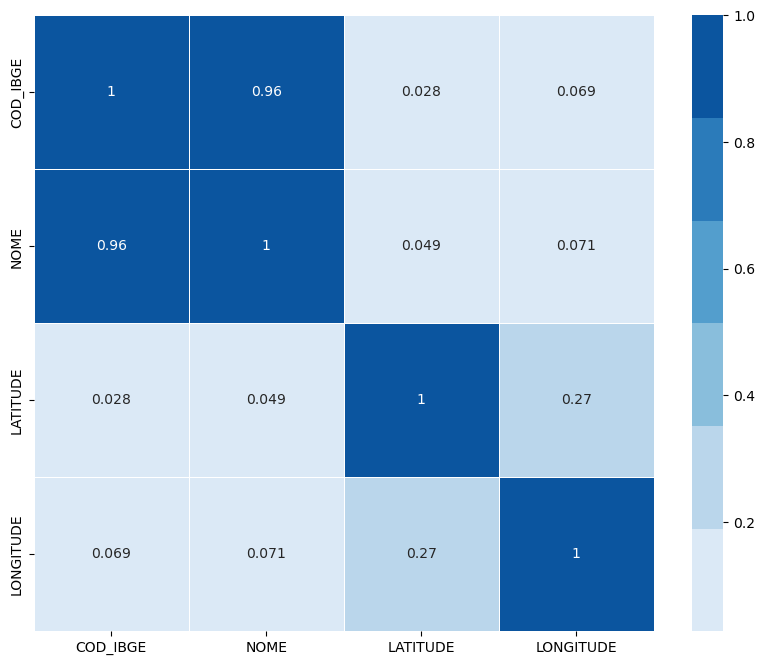

In [96]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [97]:
# Matriz de correlações
corr = tratamento_num.corr()
corr

,COD_IBGE,TIPO_INST,SIGLA_INST,NOME_INST,FORMA_ABASTEC,NOME_F_ABASTEC,NOME_ETA,ANO,CAPT_SUPERFICIAL,CAPT_SUBTERRANEA,CAPT_AGUA_CHUVA,TEMPO_MEDIO_FUNC,ETP_PRE_OXIDACAO,ETP_MIST_RAP_C0AG,ETP_FLOCULACAO,ETP_DECANTACAO,ETP_FLOTACAO,TIPO_FILTRACAO,NUM_FILTROS,IMP_MONIT,ETP_DESINFECCAO,DESINF_CLORO_GAS_HIPOC,DESINF_ISOCIANURATOS,DESINF_CLORAMINA,DESINF_DIOXIDO_CLORO,DESINF_OZONIO,DESINF_UV,OUTRO_DESINF,RAD_CLORO_RES_LIVRE,RAD_DIOX_CLORO,RAD_CLORO_RES_COMB,POLIM_COM_EPICOLIDRINA,POLIM_COM_ACRILAMIDA,ETP_FLUORETACAO,ETP_DESFLUORETACAO,OUTRA_ETP,VAZAO_AGUA,CARROPIPA,CHAFARIZ,FONTE,CISTERNA,CANALIZACAO,OUTRO_SUPRIMENTO
COD_IBGE,1.000000,0.033091,-0.011101,0.070485,-0.008025,0.020234,0.023535,0.002175,0.002054,-0.000894,-0.001962,-0.030827,0.012571,0.004773,0.001403,0.002293,-0.003803,0.009598,0.002167,0.011185,0.044537,0.036287,0.026512,-0.011221,-0.051039,-0.011061,-0.007444,NaN,0.057015,-0.049292,-0.016904,-0.001470,-0.000105,-0.020165,-0.003600,NaN,0.014889,NaN,NaN,NaN,NaN,NaN,NaN
TIPO_INST,0.033091,1.000000,0.806226,0.177405,-0.658186,0.166143,0.457941,-0.034558,0.309468,-0.263475,-0.116425,-0.074172,0.394246,0.465265,0.454437,0.456057,0.210392,-0.396269,0.421841,0.019527,0.597081,0.583102,-0.000567,0.058604,0.037018,-0.000259,0.004867,NaN,0.585067,0.037200,0.046950,0.002293,-0.002313,0.651784,0.009556,NaN,0.028075,NaN,NaN,NaN,NaN,NaN,NaN
SIGLA_INST,-0.011101,0.806226,1.000000,-0.333569,-0.566616,0.139041,0.351659,-0.045682,0.276919,-0.236938,-0.070471,-0.087119,0.457106,0.478458,0.467292,0.463551,0.213683,-0.385697,0.450842,0.023153,0.508609,0.515887,-0.011350,0.074110,0.009076,-0.007370,0.004011,NaN,0.502674,0.008491,0.066474,-0.006715,-0.007370,0.733974,0.007503,NaN,0.023798,NaN,NaN,NaN,NaN,NaN,NaN
NOME_INST,0.070485,0.177405,-0.333569,1.000000,-0.116617,0.120644,0.178634,-0.002498,0.051963,-0.043481,-0.056805,0.052720,-0.139022,-0.048335,-0.046995,-0.038215,-0.040511,0.007154,-0.071097,0.004062,0.060348,0.025811,0.026091,-0.025726,0.027889,0.019460,-0.015831,NaN,0.055171,0.028754,-0.030672,0.020897,0.004696,-0.143497,-0.002690,NaN,0.013070,NaN,NaN,NaN,NaN,NaN,NaN
FORMA_ABASTEC,-0.008025,-0.658186,-0.566616,-0.116617,1.000000,-0.244365,-0.792309,0.056085,-0.356831,0.290342,0.115005,-0.010535,-0.338031,-0.509219,-0.498678,-0.508389,-0.207691,0.441490,-0.414912,-0.033458,-0.626910,-0.597551,-0.028108,-0.033762,-0.051828,-0.014671,-0.020546,NaN,-0.613674,-0.052215,-0.026326,-0.020519,-0.008888,-0.636738,-0.011343,NaN,-0.043650,NaN,NaN,NaN,NaN,NaN,NaN
NOME_F_ABASTEC,0.020234,0.166143,0.139041,0.120644,-0.244365,1.000000,0.347085,-0.019173,0.077756,-0.060584,-0.024393,-0.015987,0.096602,0.111672,0.110384,0.105284,0.040327,-0.055458,0.077920,0.013545,0.140299,0.137327,0.030737,0.000415,-0.006396,0.007015,-0.021293,NaN,0.142267,-0.005757,-0.002532,0.015162,0.005079,0.144156,-0.016448,NaN,0.008635,NaN,NaN,NaN,NaN,NaN,NaN
NOME_ETA,0.023535,0.457941,0.351659,0.178634,-0.792309,0.347085,1.000000,-0.043377,0.196331,-0.152161,-0.091120,-0.005725,0.187169,0.263223,0.263191,0.265818,0.113254,-0.229025,0.221289,0.018034,0.429982,0.399373,0.051989,0.031882,0.045492,0.001242,0.007833,NaN,0.416401,0.047342,0.025317,0.020480,0.009865,0.414477,0.008059,NaN,0.026917,NaN,NaN,NaN,NaN,NaN,NaN
ANO,0.002175,-0.034558,-0.045682,-0.002498,0.056085,-0.019173,-0.043377,1.000000,-0.060056,0.065866,0.026853,0.051051,-0.027168,-0.059681,-0.087579,-0.056436,-0.034218,0.043402,-0.038773,0.065539,-0.033288,-0.051140,0.036301,-0.018425,-0.012229,-0.007446,-0.004338,NaN,-0.024764,-0.011931,-0.013305,0.025054,0.016077,-0.054166,0.021180,NaN,-0.009399,NaN,NaN,NaN,NaN,NaN,NaN
CAPT_SUPERFICIAL,0.002054,0.309468,0.276919,0.051963,-0.356831,0.077756,0.196331,-0.060056,1.000000,-0.883833,-0.040924,0.211653,0.353147,0.625999,0.623943,0.628392,0.271348,-0.529464,0.508643,0.026322,0.223884,0.237208,-0.009750,0.038847,0.015878,0.017552,0.021061,NaN,0.225345,0.017240,0.033058,0.007141,0.008538,0.363879,0.002618,NaN,0.043834,NaN,NaN,NaN,NaN,NaN,NaN
CAPT_SUBTERRANEA,-0.000894,-0.26

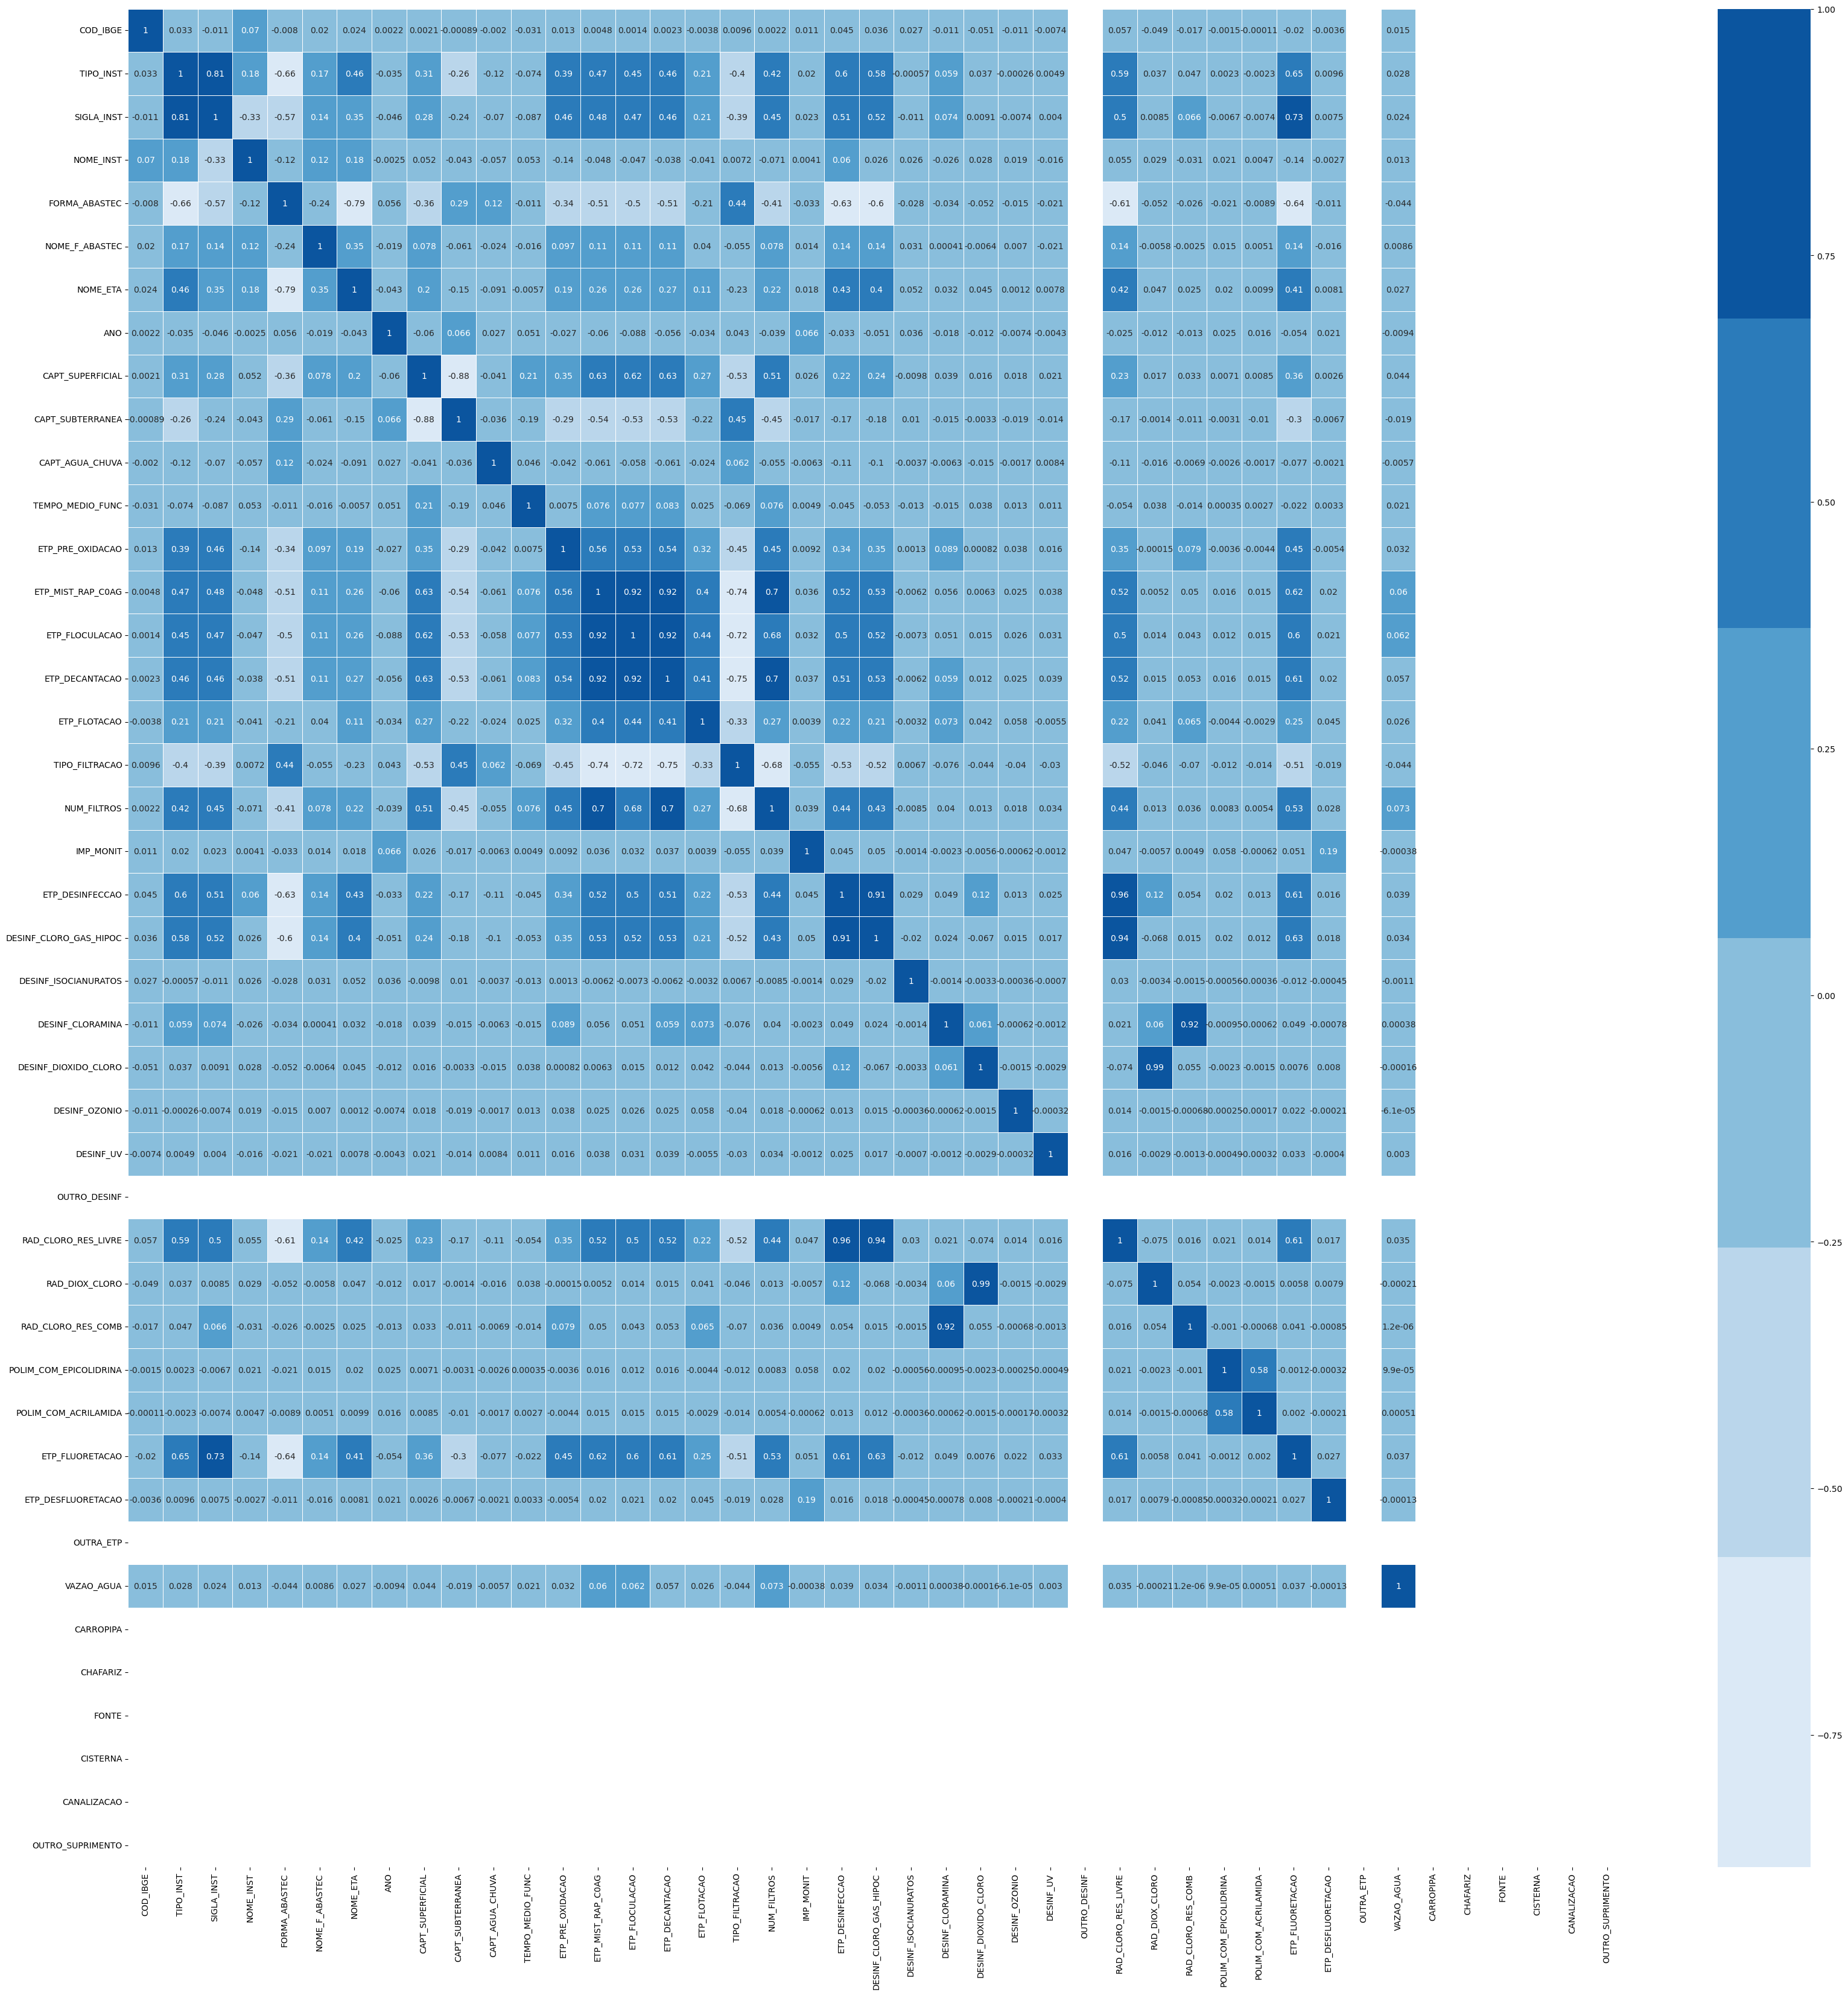

In [98]:
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);


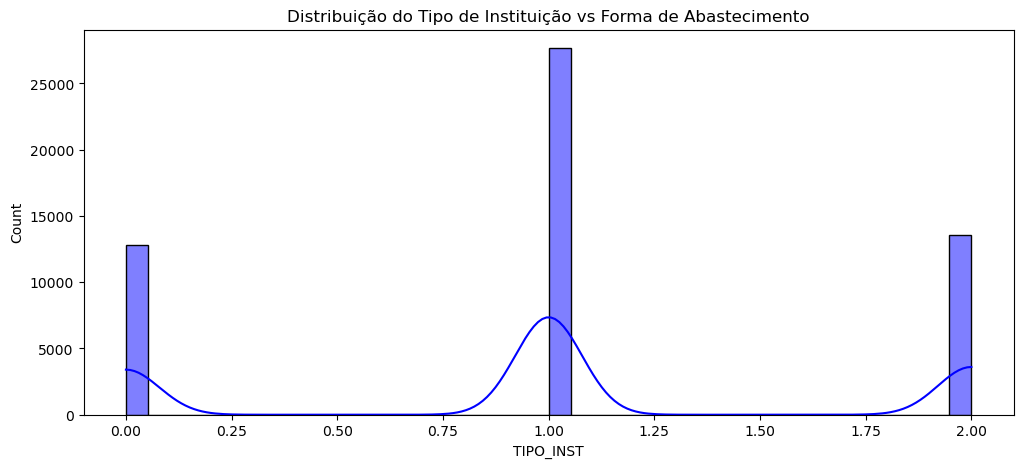

In [99]:
# Relação: TIPO_INST x FORMA_ABASTEC
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Tipo de Instituição vs Forma de Abastecimento")
sns.histplot(tratamento_num['TIPO_INST'], kde=True, color='b')
plt.show()

In [109]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


In [100]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


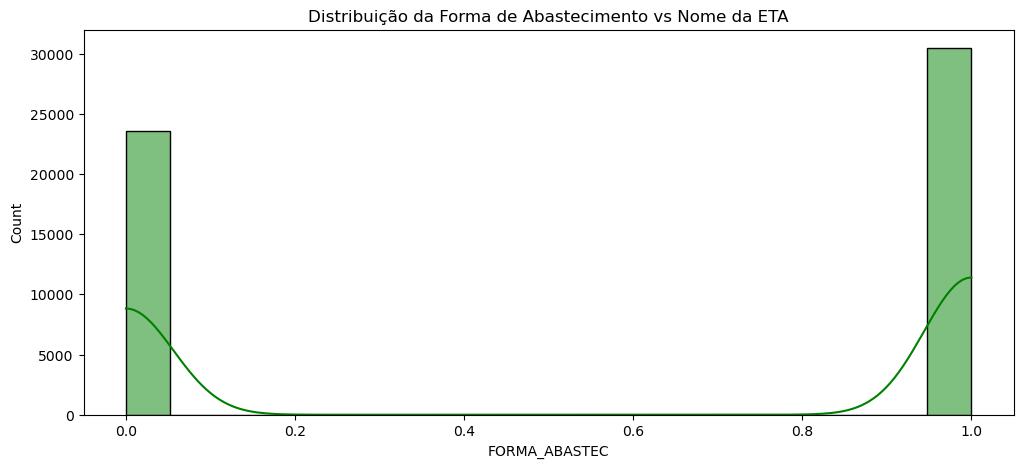

In [101]:
# Relação: FORMA_ABASTEC x NOME_ETA
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Forma de Abastecimento vs Nome da ETA")
sns.histplot(tratamento_num['FORMA_ABASTEC'], kde=True, color='g')
plt.show()

In [110]:
contagem = tratamento['NOME_ETA'].value_counts()
print(contagem)

NOME_ETA
                                                                                                        30463
COPASA                                                                                                    171
ETA                                                                                                       126
ETA CONVENCIONAL                                                                                          125
CURRALINHO                                                                                                 91
                                                                                                        ...  
ALTO MARANHÃO                                                                                               1
PEQUERI                                                                                                     1
ETA CONCIONAL/ POÇOS ARTESIANOS                                                                             1
E

In [102]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


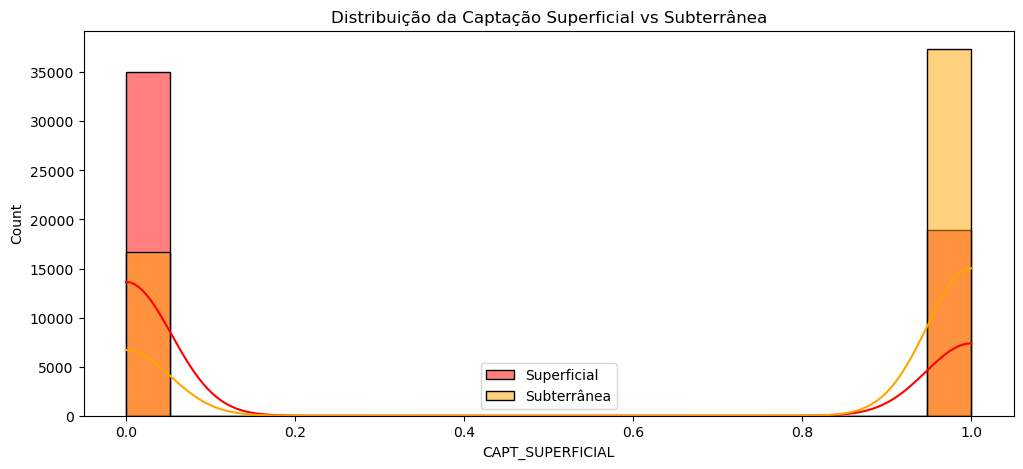

In [103]:
# Relação: CAPT_SUPERFICIAL x CAPT_SUBTERRANEA
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Captação Superficial vs Subterrânea")
sns.histplot(tratamento_num['CAPT_SUPERFICIAL'], kde=True, color='r', label="Superficial")
sns.histplot(tratamento_num['CAPT_SUBTERRANEA'], kde=True, color='orange', label="Subterrânea")
plt.legend()
plt.show()

In [104]:
contagem = tratamento['CAPT_SUPERFICIAL'].value_counts()

print(contagem)

CAPT_SUPERFICIAL
N    35074
S    18965
Name: count, dtype: int64


In [105]:
contagem = tratamento['CAPT_SUBTERRANEA'].value_counts()

print(contagem)

CAPT_SUBTERRANEA
S    37372
N    16667
Name: count, dtype: int64


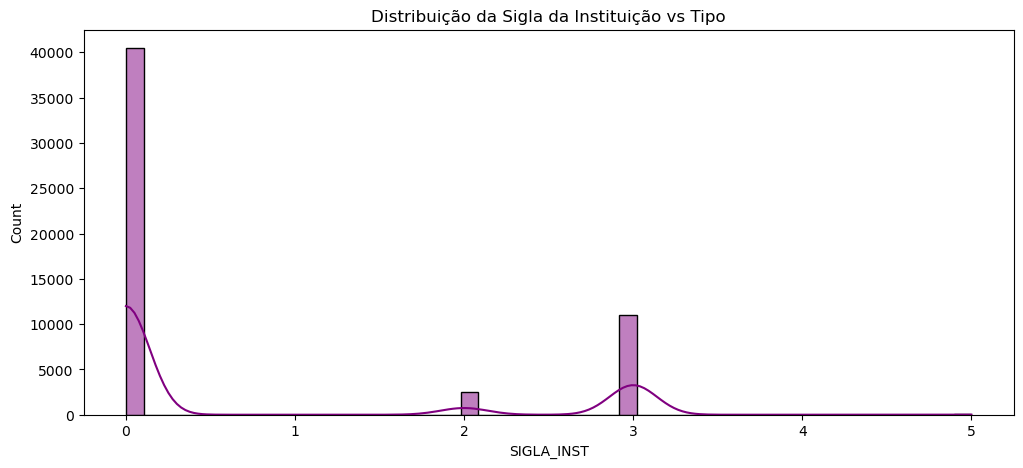

In [106]:
# Relação: SIGLA_INST x TIPO_INST
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Sigla da Instituição vs Tipo")
sns.histplot(tratamento_num['SIGLA_INST'], kde=True, color='purple')
plt.show()

In [108]:
contagem = tratamento['SIGLA_INST'].value_counts()
print(contagem)

SIGLA_INST
              40477
COPASA        11017
COPANOR        2490
SESAI            29
SA               18
AP FERNAO         8
Name: count, dtype: int64


In [107]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


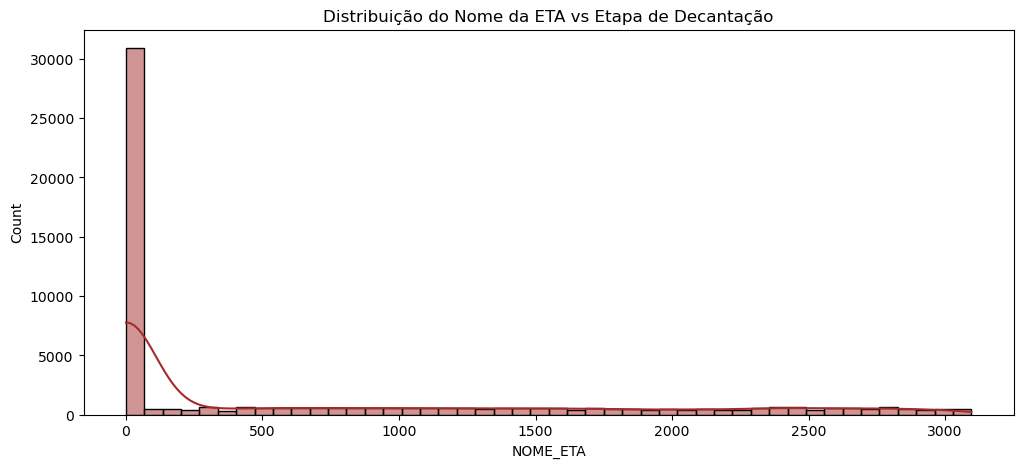

In [111]:
# Relação: NOME_ETA x ETP_DECANTACAO
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Nome da ETA vs Etapa de Decantação")
sns.histplot(tratamento_num['NOME_ETA'], kde=True, color='brown')
plt.show()


In [115]:
contagem = tratamento['NOME_ETA'].value_counts()
print(contagem)

NOME_ETA
                                                                                                        30463
COPASA                                                                                                    171
ETA                                                                                                       126
ETA CONVENCIONAL                                                                                          125
CURRALINHO                                                                                                 91
                                                                                                        ...  
ALTO MARANHÃO                                                                                               1
PEQUERI                                                                                                     1
ETA CONCIONAL/ POÇOS ARTESIANOS                                                                             1
E

In [114]:
contagem = tratamento['ETP_DECANTACAO'].value_counts()
print(contagem)

ETP_DECANTACAO
N    42955
S    11084
Name: count, dtype: int64


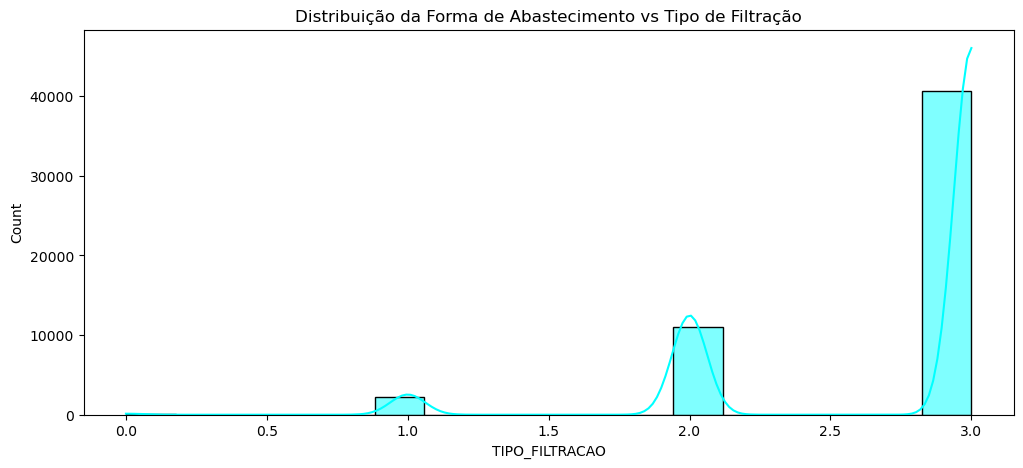

In [116]:
# Relação: FORMA_ABASTEC x TIPO_FILTRACAO
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição da Forma de Abastecimento vs Tipo de Filtração")
sns.histplot(tratamento_num['TIPO_FILTRACAO'], kde=True, color='cyan')
plt.show()

In [117]:
contagem = tratamento['TIPO_FILTRACAO'].value_counts()
print(contagem)

TIPO_FILTRACAO
SEM FILTRAÇÃO                                         40668
FILTRAÇÃO RÁPIDA                                      11021
FILTRAÇÃO LENTA                                        2238
FILTRAÇÃO EM MEMBRANAS                                  112
Name: count, dtype: int64


In [121]:
contagem = tratamento['FORMA_ABASTEC'].value_counts()
print(contagem)

FORMA_ABASTEC
SAC           30463
SAA           23576
Name: count, dtype: int64


In [ ]:
# Relação: TIPO_INST x DESINF_CLORO_GAS_HIPOC
figsize = (12, 5)
plt.figure(figsize=figsize)
plt.title("Distribuição do Tipo de Instituição vs Uso de Cloro/Hipoclorito")
sns.histplot(tratamento_num['DESINF_CLORO_GAS_HIPOC'], kde=True, color='magenta')
plt.show()

In [119]:
contagem = tratamento['TIPO_INST'].value_counts()
print(contagem)

TIPO_INST
Local       27673
Regional    13562
            12804
Name: count, dtype: int64


In [120]:
contagem = tratamento['DESINF_CLORO_GAS_HIPOC'].value_counts()
print(contagem)

DESINF_CLORO_GAS_HIPOC
N    30337
S    23702
Name: count, dtype: int64


In [122]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Suponha que tratamento seja o seu DataFrame
# Defina as variáveis independentes (X) e dependente (y)
X = tratamento_num[['CAPT_SUPERFICIAL', 'CAPT_SUBTERRANEA']]  # Variáveis independentes
y = tratamento_num['VAZAO_AGUA']  # Variável dependente

# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X, y)

# Coeficientes
print("Coeficientes:", model.coef_)

# Intercepto
print("Intercepto:", model.intercept_)

# Previsões
y_pred = model.predict(X)

# Mostre as previsões ou use para outros cálculos
print("Previsões:", y_pred)


Coeficientes: [160.65903962 120.90101024]
Intercepto: -112.02982551521922
Previsões: [8.87118472 8.87118472 8.87118472 ... 8.87118472 8.87118472 8.87118472]


In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Avaliação do modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("R²:", r2)


Erro Quadrático Médio (MSE): 387208.20220809826
R²: 0.0036770311347535944



Com base nos resultados da regressão linear, podemos fazer as seguintes conclusões:

#### Coeficientes e Intercepto
- Coeficientes:
CAPT_SUPERFICIAL: 160.66
CAPT_SUBTERRANEA: 120.90
- Intercepto: -112.03
Estes valores indicam que para cada aumento unitário em "CAPT_SUPERFICIAL", a variável dependente "VAZAO_AGUA" aumenta em 160.66, e para cada aumento unitário em "CAPT_SUBTERRANEA", a "VAZAO_AGUA" aumenta em 120.90. O valor negativo do intercepto sugere que, caso ambos os valores das variáveis independentes sejam zero, a "VAZAO_AGUA" seria de aproximadamente -112.03, o que não é intuitivo para um modelo de vazão de água, indicando que talvez o modelo não seja ideal para esses dados.

#### Previsões
As previsões de vazão de água fornecidas pelo modelo são todas iguais, com um valor de aproximadamente 8.87. Isso pode indicar que o modelo está com dificuldades em capturar a variação dos dados. Essa falta de variabilidade nas previsões sugere que o modelo pode estar sofrendo de underfitting.

#### Erro Quadrático Médio (MSE)
O Erro Quadrático Médio (MSE) de 387208.20 é relativamente alto, o que indica que o modelo está cometendo erros consideráveis em suas previsões. Quanto menor o valor de MSE, melhor o modelo, então um valor elevado sugere que o modelo não está se ajustando bem aos dados.

#### R²
O R² (coeficiente de determinação) de 0.0037 indica que o modelo explica apenas 0.37% da variação nos dados de "VAZAO_AGUA". Isso é extremamente baixo, sugerindo que a relação entre as variáveis independentes e a variável dependente é fraca ou até inexistente